In [289]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [290]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [291]:
from bioinfokit.analys import stat

In [292]:
# import csv file
df = pd.read_csv("/Users/ruoxiyang/Downloads/diabetes.csv")
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [293]:
# replace 0 values in SkinThinkness with median 
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64             23        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             23        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [294]:
#replace 0 values in Insulin with median 
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [295]:
#replace 0 values in BMI with median 
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35     30.5  33.6   
1             1       85             66             29     30.5  26.6   
2             8      183             64             23     30.5  23.3   
3             1       89             66             23     94.0  28.1   
4             0      137             40             35    168.0  43.1   
5             5      116             74             23     30.5  25.6   
6             3       78             50             32     88.0  31.0   
7            10      115              0             23     30.5  35.3   
8             2      197             70             45    543.0  30.5   
9             8      125             96             23     30.5  32.0   
10            4      110             92             23     30.5  37.6   
11           10      168             74             23     30.5  38.0   
12           10      139             80             23     30.5  27.1   
13            1      189             60             23    846.0  30.1   
14            5      166             72             19    175.0  25.8   
15            7      100              0             23     30.5  30.0   
16            0      118             84             47    230.0  45.8   
17            7      107             74             23     30.5  29.6   
18            1      103             30             38     83.0  43.3   
19            1      115             70             30     96.0  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [296]:
#replace 0 values in BloodPressure with median 
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [297]:
#replace 0 values in Glucose with median 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [298]:
# drop the columns that are not used in the study
to_drop = ['Insulin','Glucose','Pregnancies','BloodPressure','DiabetesPedigreeFunction','Age']
df.drop(columns=to_drop, inplace=True,axis=1)
df.head()


SkinThickness   BMI  Outcome
0             35  33.6        1
1             29  26.6        0
2             23  23.3        1
3             23  28.1        0
4             35  43.1        1

In [299]:
# Convert BMI into categorical variable. If the patient's BMI is 18.5 to 25, it falls within the healthy weight range. If the patient's BMI is above 25.0 and below 30, it falls within the overweight range. If the patient's BMI is 30.0 or higher, it falls within the obesity range. If the patient's BMI is lower than 18.5, it falls in the underweight range
# Healthy BMI is represented as class 2; underweight BMI is indicated by class 1; overweight BMI is shown as class 3. 
df1=df.copy()

df1['BMI'] = np.where(df1['BMI'].between(18.5,25), 2, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] == 18.2, 1, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] == 18.4, 1, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] >25, 3, df1['BMI'])


df1.head(20)

SkinThickness  BMI  Outcome
0              35  3.0        1
1              29  3.0        0
2              23  2.0        1
3              23  3.0        0
4              35  3.0        1
5              23  3.0        0
6              32  3.0        1
7              23  3.0        0
8              45  3.0        1
9              23  3.0        1
10             23  3.0        0
11             23  3.0        1
12             23  3.0        0
13             23  3.0        1
14             19  3.0        1
15             23  3.0        1
16             47  3.0        1
17             23  3.0        1
18             38  3.0        0
19             30  3.0        1

In [300]:
# Hypothesis: Test the effect of diabetes and BMI to skin thickness 

# Split the dataframe based on outcome value 
df_outcome0 = df1[df1['Outcome']==0]
df_outcome1=df1[df1['Outcome']==1]


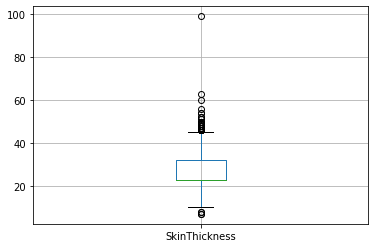

In [301]:
SkinThicknessboxplot_1 = df1.boxplot(column=['SkinThickness'])

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

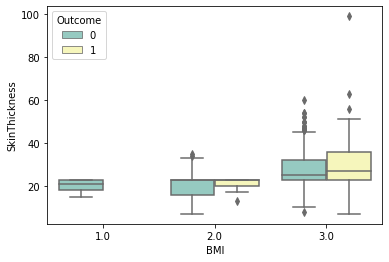

In [302]:
sns.boxplot(x="BMI", y="SkinThickness", hue="Outcome", data=df1, palette="Set3")

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

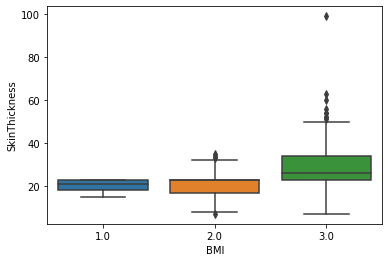

In [303]:
sns.boxplot(data = df1, x='BMI', y='SkinThickness')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

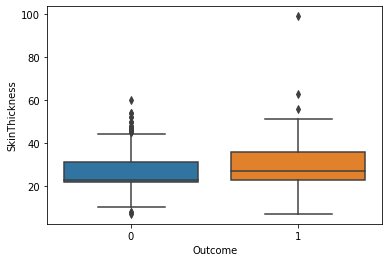

In [304]:
sns.boxplot(data = df1, x='Outcome', y='SkinThickness')

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

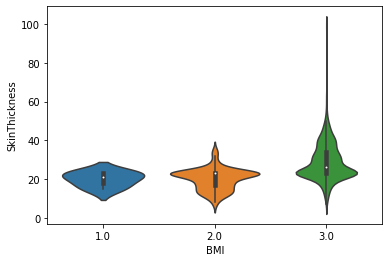

In [305]:
sns.violinplot(data = df1, x='BMI', y='SkinThickness')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

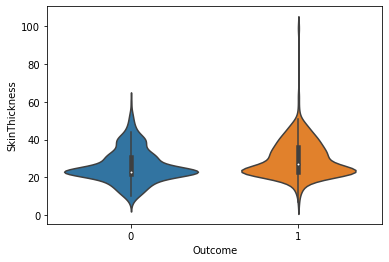

In [306]:
sns.violinplot(data = df1, x='Outcome', y='SkinThickness')

In [307]:
SkinThickness_Outcome0= df_outcome0['SkinThickness'].values.tolist()
SkinThickness_Outcome1= df_outcome1['SkinThickness'].values.tolist()


In [308]:
# independent sample t test
# t test hypothesis: 
# The null hypothesis: There is no difference in skin thickness between the population who has diabetes and the healthy population. The alternative hypothesis: there is a significant difference between the two populations. 


Text(0.5, 1.0, 'Independent Sample T-Test')

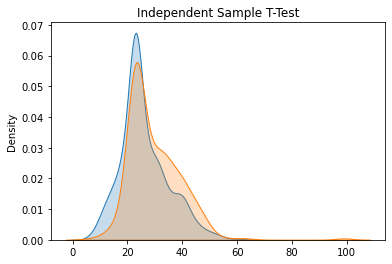

In [320]:
sns.kdeplot(SkinThickness_Outcome0, shade=True)
sns.kdeplot(SkinThickness_Outcome1, shade=True)
plt.title("Independent Sample T-Test")

In [321]:
tStat, pValue = stats.ttest_ind(SkinThickness_Outcome0, SkinThickness_Outcome1, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:3.4773163050393875e-07 T-Statistic:-5.165110346789645


In [322]:
# multiple linear regression
X = df1[['BMI','Outcome']]
y = df1['SkinThickness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [323]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI         7.335380
Outcome     1.910761

In [324]:
y_pred = regressor.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

Actual  Predicted
661      43  29.787386
122      30  27.876625
113      23  27.876625
14       19  29.787386
529      23  20.541244
..      ...        ...
476      45  29.787386
482      22  27.876625
230      23  29.787386
527      15  27.876625
380      30  27.876625

[154 rows x 2 columns]

In [325]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6.8800247381700546
Mean Squared Error: 69.18462836373939
Root Mean Squared Error: 8.317729760201361


In [326]:
# Two way anova
# The population means of BMI are equal. 
# The population means of diabetes outcome are equal. 
# There is no interaction between the two factors. 
model = ols('SkinThickness ~ C(Outcome) + C(BMI) + C(Outcome):C(BMI)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df             F        PR(>F)
C(Outcome)         3.046107e-11    1.0  4.032216e-13  9.999995e-01
C(BMI)             6.849419e+03    2.0  4.533382e+01  2.491311e-19
C(Outcome):C(BMI)  8.393126e+02    2.0  5.555105e+00  4.025729e-03
Residual           5.764027e+04  763.0           NaN           NaN

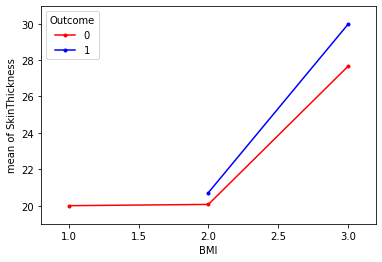

In [327]:
# Interaction plot
fig = interaction_plot(x=df1['BMI'], trace=df1['Outcome'], response=df1['SkinThickness'], 
    colors=['red','blue'])
plt.show()

In [328]:
# post hoc for main effect BMI
res = stat()
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var='BMI', anova_model='SkinThickness~C(BMI)+C(Outcome)+C(BMI):C(Outcome)')
res.tukey_summary

group1  group2      Diff      Lower      Upper    q-value   p-value
0     3.0     2.0  8.457486   6.337924  10.577049  13.251734  0.001000
1     3.0     1.0  8.568598  -1.667949  18.805144   2.779931  0.121635
2     2.0     1.0  0.111111 -10.281641  10.503863   0.035506  0.900000

In [329]:
# Post hoc for main effect Outcome
res = stat()
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var='Outcome', anova_model='SkinThickness~C(BMI)+C(Outcome)+C(BMI):C(Outcome)')
res.tukey_summary

group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  3.658418  2.366704  4.950132  7.862839    0.001

In [330]:
#Interaction effect between BMI and Outcome
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var=['BMI','Outcome'], anova_model='SkinThickness ~ C(BMI) + C(Outcome) + C(BMI):C(Outcome)')
res.tukey_summary.head()

/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:862: RuntimeWarning: divide by zero encountered in true_divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:870: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:873: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:869: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:872: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +



NaN result encountered.

NaN result encountered.

NaN result encountered.


group1    group2      Diff     Lower      Upper    q-value   p-value
0  (3.0, 1)  (3.0, 0)  2.307221  0.326441   4.288002   4.706201  0.011775
1  (3.0, 1)  (2.0, 1)  9.243569 -0.266886  18.754024   3.926954  0.062434
2  (3.0, 1)  (2.0, 0)  9.888547  6.978658  12.798437  13.730092  0.001000
3  (3.0, 1)  (1.0, 1)  0.000000      -inf        inf   0.000000  0.900000
4  (3.0, 1)  (1.0, 0)  9.957854 -2.552680  22.468389   3.215936  0.205957